In [1]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Custom functions
sys.path.insert(1, '../..')
from utils import *

# scperturb package
sys.path.insert(1, '../../../package/src/')
from scperturb import *

%matplotlib inline

In [128]:
tab = pd.read_excel('../../metadata/scperturb_dataset_info.xlsx', index_col=[0,1])
tab = tab[tab['Modality = Data type'].isin(['RNA', 'RNA + protein (RNA)'])]
tab['dataset_id'] = [a+'_'+b for (a,b), row in tab.iterrows()]

In [129]:
from pathlib import Path
path = Path(f'../snakemake/tables')    
files = {x.name.split('edist_')[-1].replace('_tables.csv', ''): x for x in path.iterdir() if 'edist' in x.name}

res = {}
for key in files.keys():
    df = pd.read_csv(files[key], index_col=0)
    if 'control' in df.columns:
        m=np.median(df.loc['control', :])
        res[key] = m

In [66]:
sub = pd.merge(pd.Series(res, name='Mean_edist'), tab, left_index=True, right_on='dataset_id')

In [69]:
sub.groupby('Perturbation').median('Mean_edist')['Mean_edist']

Perturbation
CRISPR-cas9    17.572099
CRISPRa        22.069459
CRISPRi        12.708256
cytokines      25.222171
drugs           4.790031
Name: Mean_edist, dtype: float64

<AxesSubplot:xlabel='Mean_edist', ylabel='dataset_id'>

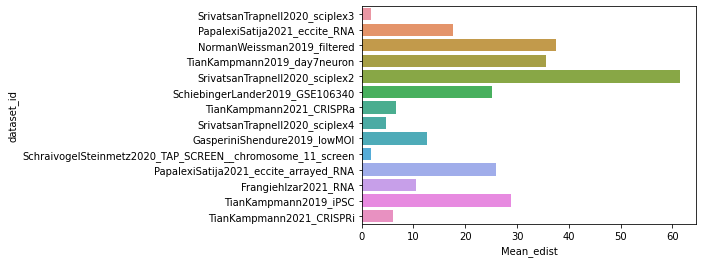

In [68]:
sns.barplot(data=sub, y='dataset_id', x='Mean_edist')

In [70]:
np.mean(sub.Mean_edist)

19.753176903470763

In [130]:
files

{'SrivatsanTrapnell2020_sciplex3': PosixPath('../snakemake/tables/edist_SrivatsanTrapnell2020_sciplex3_tables.csv'),
 'PapalexiSatija2021_eccite_RNA': PosixPath('../snakemake/tables/edist_PapalexiSatija2021_eccite_RNA_tables.csv'),
 'NormanWeissman2019_filtered': PosixPath('../snakemake/tables/edist_NormanWeissman2019_filtered_tables.csv'),
 'TianKampmann2019_day7neuron': PosixPath('../snakemake/tables/edist_TianKampmann2019_day7neuron_tables.csv'),
 'SrivatsanTrapnell2020_sciplex2': PosixPath('../snakemake/tables/edist_SrivatsanTrapnell2020_sciplex2_tables.csv'),
 'AdamsonWeissman2016_GSM2406675_10X001': PosixPath('../snakemake/tables/edist_AdamsonWeissman2016_GSM2406675_10X001_tables.csv'),
 'SchiebingerLander2019_GSE115943': PosixPath('../snakemake/tables/edist_SchiebingerLander2019_GSE115943_tables.csv'),
 'SchiebingerLander2019_GSE106340': PosixPath('../snakemake/tables/edist_SchiebingerLander2019_GSE106340_tables.csv'),
 'TianKampmann2021_CRISPRa': PosixPath('../snakemake/tables/

In [140]:
df = pd.read_csv(files['SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_11_screen'], index_col=0)

In [141]:
df

,multiplet,control,non-targeting_00028,chr11:1488473-1488949_8_+,RASSF7_+_561000.23-P1P2,non-targeting_00003,chr11:518541-519179_46_-,non-targeting_00025,RRP8_+_6624578.23-P1P2,TSPAN4_+_843278.23-P1,...,chr11:5012186-5012772_22_-,chr11:355351-355535_3_-,chr11:9634658-9635138_9_-,chr11:13894497-13895524_22_-,chr11:13136403-13136789_12_+,chr11:9639705-9639825_6_-,chr11:15671503-15672440_75_-,chr11:2888381-2889755_28_+,chr11:2292210-2292477_1_+,chr11:10738286-10738854_26_+
multiplet,0.000000,0.361055,1.553395,2.084092,4.400329,12.799240,27.409840,8.958674,3.049761,7.541072,...,18.362301,3.753959,10.180204,1.447699,14.488634,1.279983,0.911767,0.229394,1.554033,1.184795
control,0.361055,0.000000,1.235008,2.423159,3.701086,12.359355,26.679809,8.679370,3.121288,6.847079,...,17.878166,3.733306,10.142700,1.196399,14.458978,0.794089,0.973582,0.149406,1.294762,1.048230
non-targeting_00028,1.553395,1.235008,0.000000,3.505724,3.144372,11.969820,29.231404,7.255589,2.111506,7.095108,...,19.300225,5.818384,11.860178,2.744906,14.889928,2.289657,2.267766,1.142475,3.052190,2.872922
chr11:1488473-1488949_8_+,2.084092,2.423159,3.505724,0.000000,6.179978,14.055717,29.964287,10.996628,4.760062,9.979272,...,20.923982,4.992195,10.982879,3.237988,16.342851,3.457851,2.433452,1.944724,3.378818,3.335833
RASSF7_+_561000.23-P1P2,4.400329,3.701086,3.144372,6.179978,0.000000,7.418357,31.672173,11.393229,5.675005,5.901427,...,24.380954,8.191757,14.966013,4.603979,18.220769,4.464876,5.634351,3.841884,5.114942,4.938709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr11:9639705-9639825_6_-,1.279983,0.794089,2.289657,3.457851,4.464876,13.887047,28.486357,9.923703,4.677023,8.860339,...,18.613228,4.903881,10.420659,2.343125,15.656720,0.000000,1.972245,1.002533,2.140155,2.106640
chr11:15671503-15672440_75_-,0.911767,0.973582,2.267766,2.433452,5.634351,13.861368,25.682121,10.117109,3.706832,9.233289,...,18.615115,3.450999,10.699651,2.314654,15.201545,1.972245,0.000000,0.747601,2.578672,1.788157
chr11:2888381-2889755_28_+,0.229394,0.149406,1.142475,1.944724,3.841884,12.323593,27.171707,8.504579,2.858974,7.101937,...,18.046355,3.958239,10.025470,1.240214,14.258212,1.002533,0.747601,0.000000,1.421697,1.142608
chr11:2292210-2292477_1_+,1.554033,1.294762,3.052190,3.378818,5.114942,13.576762,29.766967,11.507124,5.337945,6.898865,...,19.038373,5.069125,12.818981,1.944970,16.266878,2.140155,2.578672,1.421697,0.000000,1.573976


In [163]:
sel = [x for x in df.columns if 'non-targeting' in x]
A = df.loc['control', sel]
a = np.mean(A.values)
B = df.iloc[~df.index.isin(sel + ['control']), df.index=='control']
b = np.mean(B.values)

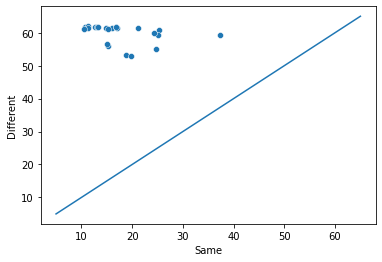

Same         17.659771
Different    59.812114
dtype: float64

In [138]:
df = pd.read_csv(files['PapalexiSatija2021_eccite_RNA'], index_col=0)
perts = pd.unique(df.columns)
uni = pd.unique([p[:-2] for p in perts if p!='control'])
r = {}
for u in uni:
    sel = [p for p in perts if u in p]
    A = df.loc[sel, sel]
    a = np.mean(A.values[np.triu_indices(len(A), k=1)])
    B = df.iloc[~df.index.isin(sel), ~df.index.isin(sel)]
    b = np.mean(B.values[np.triu_indices(len(B), k=1)])
    r[u] = [a,b]
X = pd.DataFrame(r, index=['Same', 'Different']).T
sns.scatterplot(data=X, x='Same', y='Different')
pl.plot([5, 65], [5, 65])
pl.show()
X.mean()